In [3]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd

%matplotlib inline

emply = pd.read_excel(open('../../../Data/CS120Clinical/CS120Final_Baseline.xlsx','r'))
subjects = emply['ID']
subjects = subjects.astype(str)
subjects_employed = subjects[emply['slabels02']==1]
subjects_unemployed = subjects[np.logical_and(emply['slabels02']>=2,emply['slabels02']<=5)]

data_dir = '/data/CS120/'
subjects = os.listdir(data_dir)

loc_subject = []
loc_subject_employed = []
loc_subject_employed_uniq = []
loc_all_employed = np.array([])
loc_subject_unemployed = []
loc_subject_unemployed_uniq = []
loc_all_unemployed = np.array([])
subject_loc = np.array([])
subject_employed = np.array([])
for subj in subjects:
    filename = data_dir + subj + '/eml.csv'
    if os.path.exists(filename):
        #print filename
        with open(filename) as file_in:
            data = csv.reader(file_in, delimiter='\t')
            loc = np.array([])
            for data_row in data:
                if data_row:
                    loc_string = data_row[6]
                    loc_string = loc_string[1:len(loc_string)-1]
                    loc_string = loc_string.replace('"','')
                    if loc_string=='Vehicle':
                        continue
                    loc = np.append(loc, loc_string)
                    if any(subjects_employed==subj):
                        loc_all_employed = np.append(loc_all_employed, loc_string)
                    else:
                        loc_all_unemployed = np.append(loc_all_unemployed, loc_string)
        if any(subjects_employed==subj):
            loc_subject_employed.append(loc)
            loc_subject_employed_uniq.append(np.unique(loc))
            subject_employed = np.append(subject_employed, 1)
        else:
            loc_subject_unemployed.append(loc)
            loc_subject_unemployed_uniq.append(np.unique(loc))
            subject_employed = np.append(subject_employed, 0)
        loc_subject.append(loc)
        subject_loc = np.append(subject_loc, subj)
    else:
        print 'subject '+subj+' skipped due to no eml.csv'



subject EW057DI skipped due to no eml.csv
subject 1496251 skipped due to no eml.csv
subject .dropbox skipped due to no eml.csv


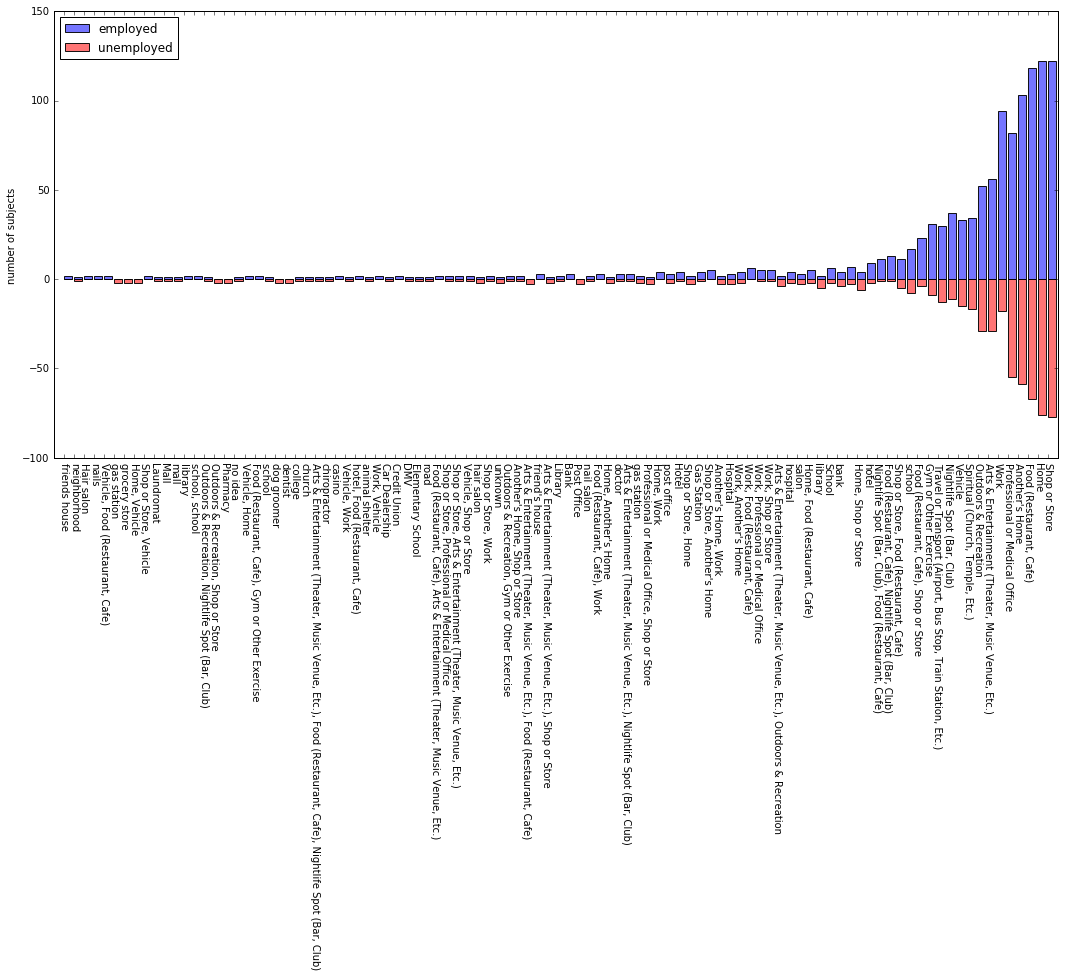

In [79]:
# finding number of subjects who used each location (employed)
import pickle

loc_all_uniq = np.unique(np.append(loc_all_employed,loc_all_unemployed))
freq_employed = np.zeros(loc_all_uniq.size)
freq_unemployed = np.zeros(loc_all_uniq.size)
for (i,loc_uniq) in enumerate(loc_all_uniq):
    for loc_subj in loc_subject_employed_uniq:
        if loc_uniq in loc_subj:
            freq_employed[i] += 1
    for loc_subj in loc_subject_unemployed_uniq:
        if loc_uniq in loc_subj:
            freq_unemployed[i] += 1

# removing total freq < 1
ind_highfreq = np.where(freq_employed+freq_unemployed>1)[0]
loc_all_uniq = loc_all_uniq[ind_highfreq]
freq_employed = freq_employed[ind_highfreq]
freq_unemployed = freq_unemployed[ind_highfreq]

# sorting based on total frequency
ind_sort = np.argsort(freq_employed+freq_unemployed)
loc_all_uniq = loc_all_uniq[ind_sort]
freq_employed = freq_employed[ind_sort]
freq_unemployed = freq_unemployed[ind_sort]

# plotting
plt.figure(figsize=(18,8))
show_from = 0
axes = plt.gca()
axes.bar(range(len(loc_all_uniq)-show_from), freq_employed[show_from:], color=(.4,.4,1), alpha=0.9)
axes.bar(range(len(loc_all_uniq)-show_from), -freq_unemployed[show_from:], color=(1,.4,.4), alpha=0.9)
plt.legend(['employed','unemployed'],loc='upper left')
plt.ylabel('number of subjects')
axes.set_xlim([-1, len(loc_all_uniq)-show_from])
plt.xticks(range(len(loc_all_uniq)-show_from), loc_all_uniq[show_from:], fontsize=10, color=(0,0,0), rotation=270);

In [80]:
loc_top10

array(['Outdoors & Recreation',
       'Arts & Entertainment (Theater, Music Venue, Etc.)', 'Work',
       'Professional or Medical Office', "Another's Home",
       'Food (Restaurant, Cafe)', 'Home', 'Shop or Store'], 
      dtype='|S129')

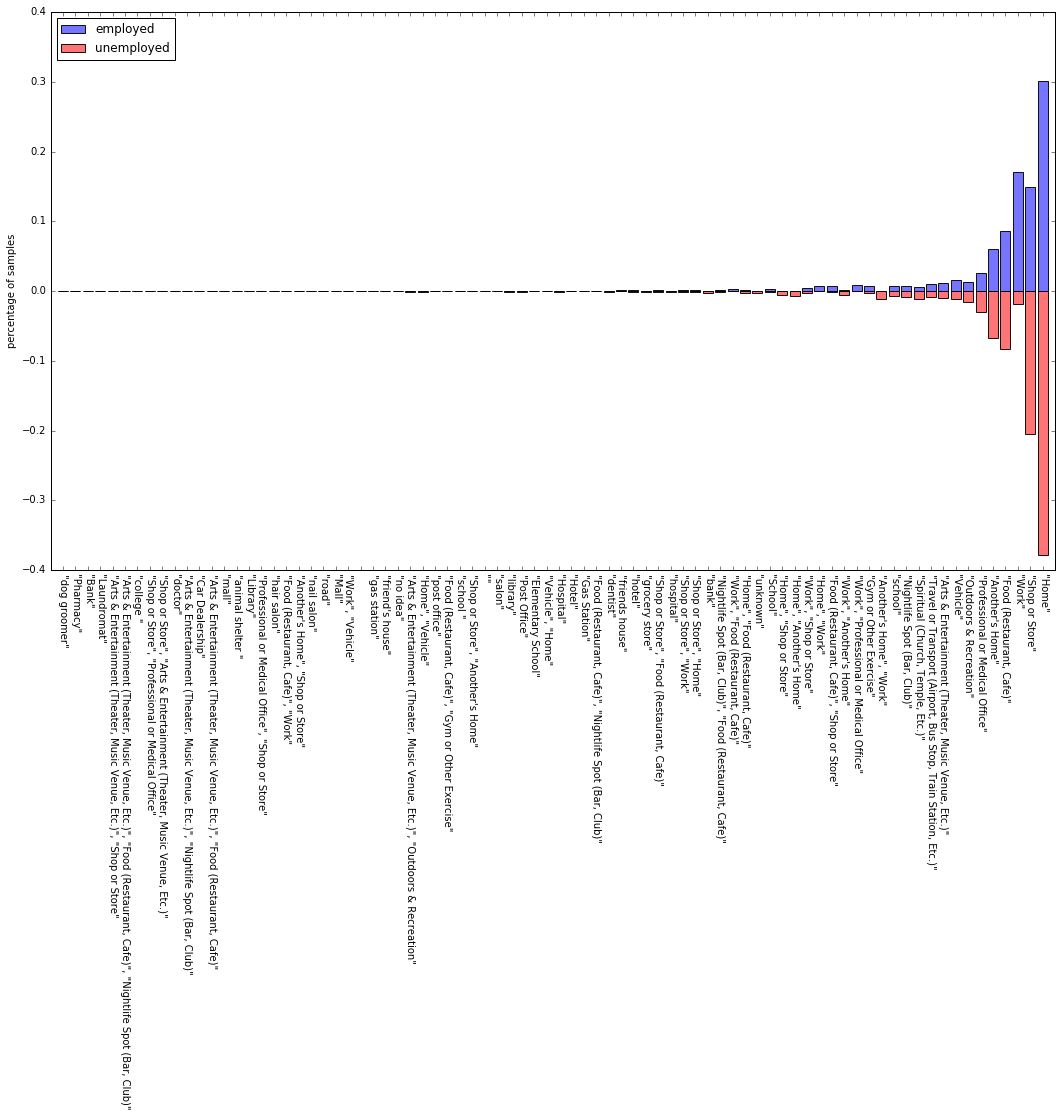

In [4]:
# finding the number of samples for each location in all subjects
# this will be roughly equivalent to the average percentage of time spent at that location across the subjects

loc_all_uniq = np.unique(np.append(loc_all_employed,loc_all_unemployed))

# filtering based on freq > 1
freq_employed = np.zeros(loc_all_uniq.size)
freq_unemployed = np.zeros(loc_all_uniq.size)
for (i,loc_uniq) in enumerate(loc_all_uniq):
    for loc_subj in loc_subject_employed_uniq:
        if loc_uniq in loc_subj:
            freq_employed[i] += 1
    for loc_subj in loc_subject_unemployed_uniq:
        if loc_uniq in loc_subj:
            freq_unemployed[i] += 1
ind_highfreq = np.where(freq_employed+freq_unemployed>1)[0]
loc_all_uniq = loc_all_uniq[ind_highfreq]

perc_employed = np.array([])
perc_unemployed = np.array([])
for (i,loc_uniq) in enumerate(loc_all_uniq):
    inds_employed = np.where(loc_all_employed==loc_uniq)[0]
    perc_employed = np.append(perc_employed, inds_employed.size/float(loc_all_employed.size))
    inds_unemployed = np.where(loc_all_unemployed==loc_uniq)[0]
    perc_unemployed = np.append(perc_unemployed, inds_unemployed.size/float(loc_all_unemployed.size))
                              
ind_sort = np.argsort(perc_employed+perc_unemployed)
loc_all_uniq = loc_all_uniq[ind_sort]
perc_employed = perc_employed[ind_sort]
perc_unemployed = perc_unemployed[ind_sort]

plt.figure(figsize=(18,10))
show_from = 20
axes = plt.gca()
axes.bar(range(len(loc_all_uniq)-show_from), perc_employed[show_from:], align='center', color=(.4,.4,1), alpha=0.9)
axes.bar(range(len(loc_all_uniq)-show_from), -perc_unemployed[show_from:], align='center', color=(1,.4,.4), alpha=0.9)
plt.legend(['employed','unemployed'],loc='upper left')
plt.ylabel('percentage of samples')
axes.set_xlim([-1, len(loc_all_uniq)-show_from])
plt.xticks(range(len(loc_all_uniq)-show_from), loc_all_uniq[show_from:], fontsize=10, color=(0,0,0), rotation=270);

700
['Home' 'Shop or Store' 'Work' 'Food (Restaurant, Cafe)' "Another's Home"
 'Professional or Medical Office' 'Outdoors & Recreation'
 'Arts & Entertainment (Theater, Music Venue, Etc.)'
 'Travel or Transport (Airport, Bus Stop, Train Station, Etc.)'
 'Spiritual (Church, Temple, Etc.)' 'Nightlife Spot (Bar, Club)']


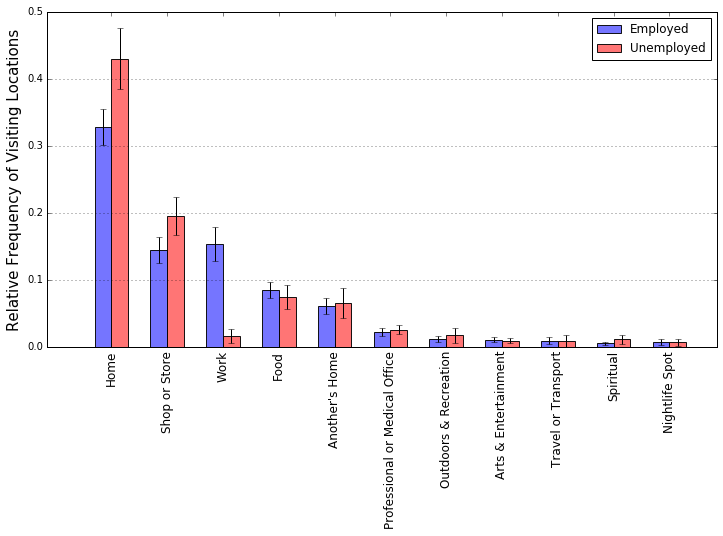

In [8]:
# a better measure of the average percentage of time spent at that location across the subjects
# the percentage is calculated for each subejcts and then averaged across the subjects - with CIs computed as well

save_results = False

loc_all_uniq = np.unique(np.append(loc_all_employed,loc_all_unemployed))
print loc_all_uniq.size

# filtering based on freq > 1
freq_employed = np.zeros(loc_all_uniq.size)
freq_unemployed = np.zeros(loc_all_uniq.size)
for (i,loc_uniq) in enumerate(loc_all_uniq):
    for loc_subj in loc_subject_employed_uniq:
        if loc_uniq in loc_subj:
            freq_employed[i] += 1
    for loc_subj in loc_subject_unemployed_uniq:
        if loc_uniq in loc_subj:
            freq_unemployed[i] += 1
ind_highfreq = np.where(freq_employed+freq_unemployed>1)[0]
loc_all_uniq = loc_all_uniq[ind_highfreq]

perc_loc = pd.DataFrame()
for (i,_) in enumerate(loc_subject_employed):
    for (j,loc_uniq) in enumerate(loc_all_uniq):
        perc_loc.loc[i,j] = np.sum(loc_subject_employed[i]==loc_uniq)/float(loc_subject_employed[i].size)
perc_employed_mean = np.array(np.mean(perc_loc, axis=0))
perc_employed_ci = np.array(np.std(perc_loc, axis=0)*1.96/np.sqrt(len(loc_subject_employed)))

perc_loc = pd.DataFrame()
for (i,_) in enumerate(loc_subject_unemployed):
    for (j,loc_uniq) in enumerate(loc_all_uniq):
        perc_loc.loc[i,j] = np.sum(loc_subject_unemployed[i]==loc_uniq)/float(loc_subject_unemployed[i].size)
perc_unemployed_mean = np.array(np.mean(perc_loc, axis=0))
perc_unemployed_ci = np.array(np.std(perc_loc, axis=0)*1.96/np.sqrt(len(loc_subject_unemployed)))
                             
ind_sort = np.argsort(perc_employed_mean+perc_unemployed_mean)[::-1]

loc_all_uniq = loc_all_uniq[ind_sort]
perc_employed_mean = perc_employed_mean[ind_sort]
perc_unemployed_mean = perc_unemployed_mean[ind_sort]
perc_employed_ci = perc_employed_ci[ind_sort]
perc_unemployed_ci = perc_unemployed_ci[ind_sort]

show_until = 11
xlabel = loc_all_uniq[:show_until]
print loc_all_uniq[:show_until]

if save_results:
    import pickle
    loc_top = loc_all_uniq[:show_until]
    with open('top_locations.dat', 'w') as f:
        pickle.dump(loc_top, f)
    f.close()

# removing extra words
for (i,xl) in enumerate(xlabel):
    label_broken = xl.split('(')
    xlabel[i] = label_broken[0]
    if len(label_broken)>1:
        xlabel[i] = xlabel[i][:-1]

plt.figure(figsize=(12,6))
axes = plt.gca()
axes.bar(np.arange(0,show_until,1), perc_employed_mean[:show_until], yerr=perc_employed_ci[:show_until],\
          color=(.4,.4,1), alpha=0.9, ecolor=(0,0,0), align='center', width=0.3)
axes.bar(np.arange(.3,show_until+.3,1), perc_unemployed_mean[:show_until], yerr=perc_unemployed_ci[:show_until],\
          color=(1,.4,.4), alpha=0.9, ecolor=(0,0,0), align='center', width=0.3)
plt.legend(['Employed','Unemployed'],loc='upper right',fontsize=12)
plt.ylabel('Relative Frequency of Visiting Locations',fontsize=15)
plt.xticks(np.arange(.15,show_until+.15,1), loc_all_uniq[:show_until], fontsize=12, color=(0,0,0), rotation=90)
axes.set_xlim([-1, show_until])
plt.grid(axis='y')



In [7]:
print loc_all_uniq[:show_until]

['Home' 'Shop or Store' 'Work' 'Food' "Another's Home"
 'Professional or Medical Office' 'Outdoors & Recreation'
 'Arts & Entertainment' 'Travel or Transport' 'Spiritual' 'Nightlife Spot']


In [ ]:
# now looking subject wise for important categories

loc_all_uniq = np.unique(np.append(loc_all_employed,loc_all_unemployed))
freq_employed = np.zeros(loc_all_uniq.size)
freq_unemployed = np.zeros(loc_all_uniq.size)
for (i,loc_uniq) in enumerate(loc_all_uniq):
    for loc_subj in loc_subject_employed_uniq:
        if loc_uniq in loc_subj:
            freq_employed[i] += 1
    for loc_subj in loc_subject_unemployed_uniq:
        if loc_uniq in loc_subj:
            freq_unemployed[i] += 1

# sorting based on total frequency
ind_sort = np.argsort(freq_employed+freq_unemployed)
loc_all_uniq = loc_all_uniq[ind_sort]

# only keeping top 3
loc_all_uniq = loc_all_uniq[loc_all_uniq.size-6:]

# calculating subject-wise percentages
perc = np.empty([loc_all_uniq.size, len(loc_subject)])
for (i,loc_uniq) in enumerate(loc_all_uniq):
    for (j,loc_subj) in enumerate(loc_subject):
        ind = np.where(loc_subj==loc_uniq)[0]
        perc[i,j] = float(ind.size)/float(loc_subj.size)

plt.figure(figsize=(18,20))
axes = plt.gca()
cat = 0
for (i,s) in enumerate(loc_subject):
    if subject_employed[i]:
        plt.barh(i, perc[cat,i], align='center', color=(.4,.4,1), alpha=0.9)
    else:
        plt.barh(i, perc[cat,i], align='center', color=(1,.4,.4), alpha=0.9)
plt.title(loc_all_uniq[cat])
plt.yticks(range(len(subject_loc)), np.array(subject_loc), fontsize=8, color=(0,0,0));
axes = plt.gca()
axes.set_ylim([-1, len(subject_loc)])
print loc_all_uniq

In [ ]:
len(loc_subject_unemployed)/float(127+79)